In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt


In [3]:
from collections import Counter

In [4]:
plt.style.use("fivethirtyeight")

In [5]:
#col_list=['Respondent','LanguageWorkedWith']
# load only those columns that are in col_list, for this use usecols parameter

data = pd.read_csv('survey_results_public.csv', usecols= ["Respondent","LanguageWorkedWith"])

In [6]:
data.head()

,Respondent,LanguageWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [7]:
data.shape

(88883, 2)

In [19]:
data.loc[data['Respondent'] < 6, 'LanguageWorkedWith' ]

0                HTML/CSS;Java;JavaScript;Python
1                            C++;HTML/CSS;Python
2                                       HTML/CSS
3                            C;C++;C#;Python;SQL
4    C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
Name: LanguageWorkedWith, dtype: object

[Check here for loc iloc](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#:~:text=The%20iloc%20indexer%20for%20Pandas,based%20indexing%20%2F%20selection%20by%20position.&text=%23%20Rows%3A,a%20Series%20data%20type%20output.)

In [20]:
columnSeriesObj = data['LanguageWorkedWith' ]
print(type(columnSeriesObj))

<class 'pandas.core.series.Series'>


In [28]:
data['LanguageWorkedWith'].values

array(['HTML/CSS;Java;JavaScript;Python', 'C++;HTML/CSS;Python',
       'HTML/CSS', ...,
       'Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;WebAssembly',
       'HTML/CSS;JavaScript;Other(s):',
       'Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript;PHP;SQL;Swift'],
      dtype=object)

In [8]:
data.dropna(inplace=True)

In [29]:
# no need of list conversion

list_col = data['LanguageWorkedWith'].tolist()

#### tolist() method coverts the dataframe series object into a list

In [30]:
len(list_col)

87569

In [33]:
list_col[1].split(';')

# the elements of list can be considered as strings, so plit method can be used

['C++', 'HTML/CSS', 'Python']

In [35]:
# no need to use list
language_counter = Counter()

for i in list_col:
    language_counter.update(i.split(';')) 
    
print(language_counter)

# learn counter
# counter.update takes a list as input, and gives the item and its count as key:value pair

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


#### Instead of conversion to list, we can directly use dataframe[column] in the for loop.

In [9]:
language_counter = Counter()

for i in data['LanguageWorkedWith']:
    language_counter.update(i.split(';')) 
    

print(language_counter)    

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [10]:
print(language_counter.most_common(15))

# most_common method of counter gives the key and its value as tuple, the output is a list of tuples.

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


In [11]:
# now we need to seperate the language and its count as two lists to plot the graph

language = []
popularity = []

# popularity represents the language numbers 

for item in language_counter.most_common(15):
    language.append(item[0])
    popularity.append(item[1])
    

#### Instead of the for loop above we could use zip function
     - languages, popularity = map(list, zip(*language_counter.most_common(15)))
     
  It is unpacking operator,  since each tuple two has two values (lang, votes) so the * unpacks these values. then the list is helping to lists of each value i.e. langauges and popularity. Basically this approach is called list comprehension and it is pretty powerful.

In [12]:
print(language)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']


In [13]:
print(popularity)

[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


#### Now we have the arrays, we can plot graph

Text(0, 0.5, 'Number of people')

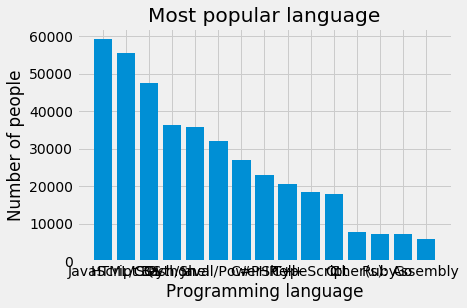

In [14]:
# Bars on x-axis
plt.bar(language,popularity)

plt.title('Most popular language')
plt.xlabel('Programming language')
plt.ylabel('Number of people')

#### In the above graph, in x-axis , the programming languages are overwritten.
- We use barh() method, where first value is the y axis value

Text(0.5, 0, 'Number of people')

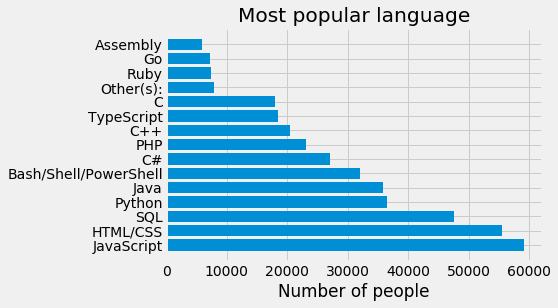

In [16]:
plt.barh(language,popularity)

plt.title('Most popular language')
#plt.ylabel('Programming language')
plt.xlabel('Number of people')

<BarContainer object of 15 artists>

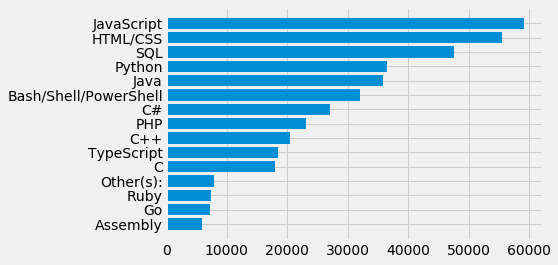

In [17]:
# Reverse the list to get the language with maximum users at the top, in reverse() there is no need to 

language.reverse()
popularity.reverse()

plt.barh(language,popularity)

###### check here for csv_reader method
[http://bit.ly/Matplotlib-02]